In [39]:
from sklearn.metrics import confusion_matrix

In [22]:
#We are predicting the IMDB score based on number based features, we can add parental ratings
#Try to do inflation conversion after we have trained a basic model 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#check vector scoring and add genre columns with 0 and 1
# read data into df
#'num_critic_for_reviews','num_user_for_reviews','num_voted_users'
#fields = ['director_facebook_likes','gross','num_critic_for_reviews','num_user_for_reviews','num_voted_users','duration','title_year','movie_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','content_rating','imdb_score']
fields = ['gross','duration','title_year','movie_facebook_likes','imdb_score','content_rating']
df = pd.read_csv("./data/movie_metadata.csv", usecols=fields)
df = df[fields]

In [23]:
df.info()
df.dropna(how='any', inplace=True)
df.content_rating.replace(['PG-13', 'PG', 'G', 'R', 'TV-14', 'Not Rated', 'Unrated','Approved', 'NC-17', 'X', 'GP', 'Passed', 'M', 'TV-G', 'TV-PG','USA'],[0,1,3,4,5,6,7,8,9,10,11,12,13,14,14,15],inplace=True)

num_df = df[df.columns[-15:]].apply(pd.to_numeric, errors='coerce')
num_df.dropna(how='any', inplace=True)

num_df.info()

num_df[df.columns[-15:]] = num_df[df.columns[-15:]].astype(int)
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 6 columns):
gross                   4159 non-null float64
duration                5028 non-null float64
title_year              4935 non-null float64
movie_facebook_likes    5043 non-null int64
imdb_score              5043 non-null float64
content_rating          4741 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 236.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4091 entries, 0 to 5042
Data columns (total 6 columns):
gross                   4091 non-null float64
duration                4091 non-null float64
title_year              4091 non-null float64
movie_facebook_likes    4091 non-null int64
imdb_score              4091 non-null float64
content_rating          4091 non-null int64
dtypes: float64(4), int64(2)
memory usage: 223.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4091 entries, 0 to 5042
Data columns (total 6 columns):
gross                

In [24]:
X = num_df.iloc[:, 0:-1].values #X = features
y = num_df.iloc[:, -1].values #y = label

In [25]:
num_df.content_rating.unique()

array([ 0,  1,  3,  4,  7,  8,  9, 10,  6, 13, 11, 12], dtype=int64)

In [26]:
X.shape
X

array([[760505847,       178,      2009,     33000,         7],
       [309404152,       169,      2007,         0,         7],
       [200074175,       148,      2015,     85000,         6],
       ..., 
       [     4584,        95,      2011,       413,         6],
       [    10443,       100,      2012,       660,         6],
       [    85222,        90,      2004,       456,         6]])

In [27]:
y

array([0, 0, 0, ..., 6, 0, 1])

In [28]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [29]:
X.shape
y_test.shape

(1228,)

In [30]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

C:\Users\Kalina Spasova\Downloads\WinPython-64bit-3.5.2.2Qt5\python-3.5.2.amd64\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=50, algorithm='auto', metric='minkowski', p=2, weights='distance')

In [34]:
movie_knn = knn.fit(X_train, y_train) # movie_knn is the model/classifier

In [35]:
movie_knn.score(X_test, y_test)

0.46498371335504884

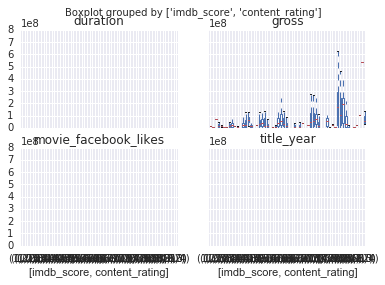

In [36]:
%matplotlib inline
boxplots_by_group = num_df.boxplot(by=['imdb_score', 'content_rating'], return_type='axes')

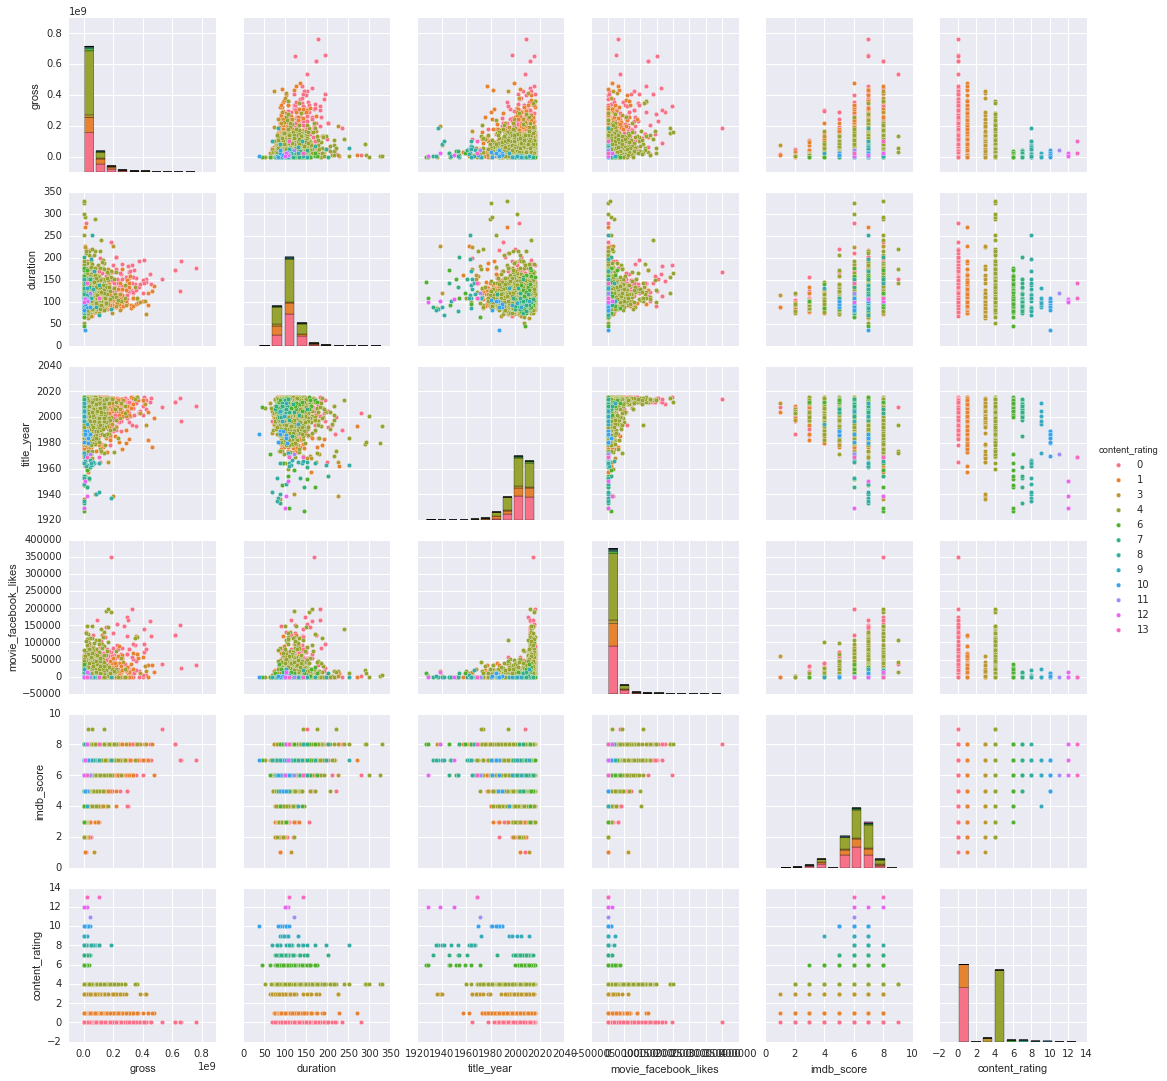

In [37]:
import seaborn as sns
sns.pairplot(num_df, hue='content_rating')

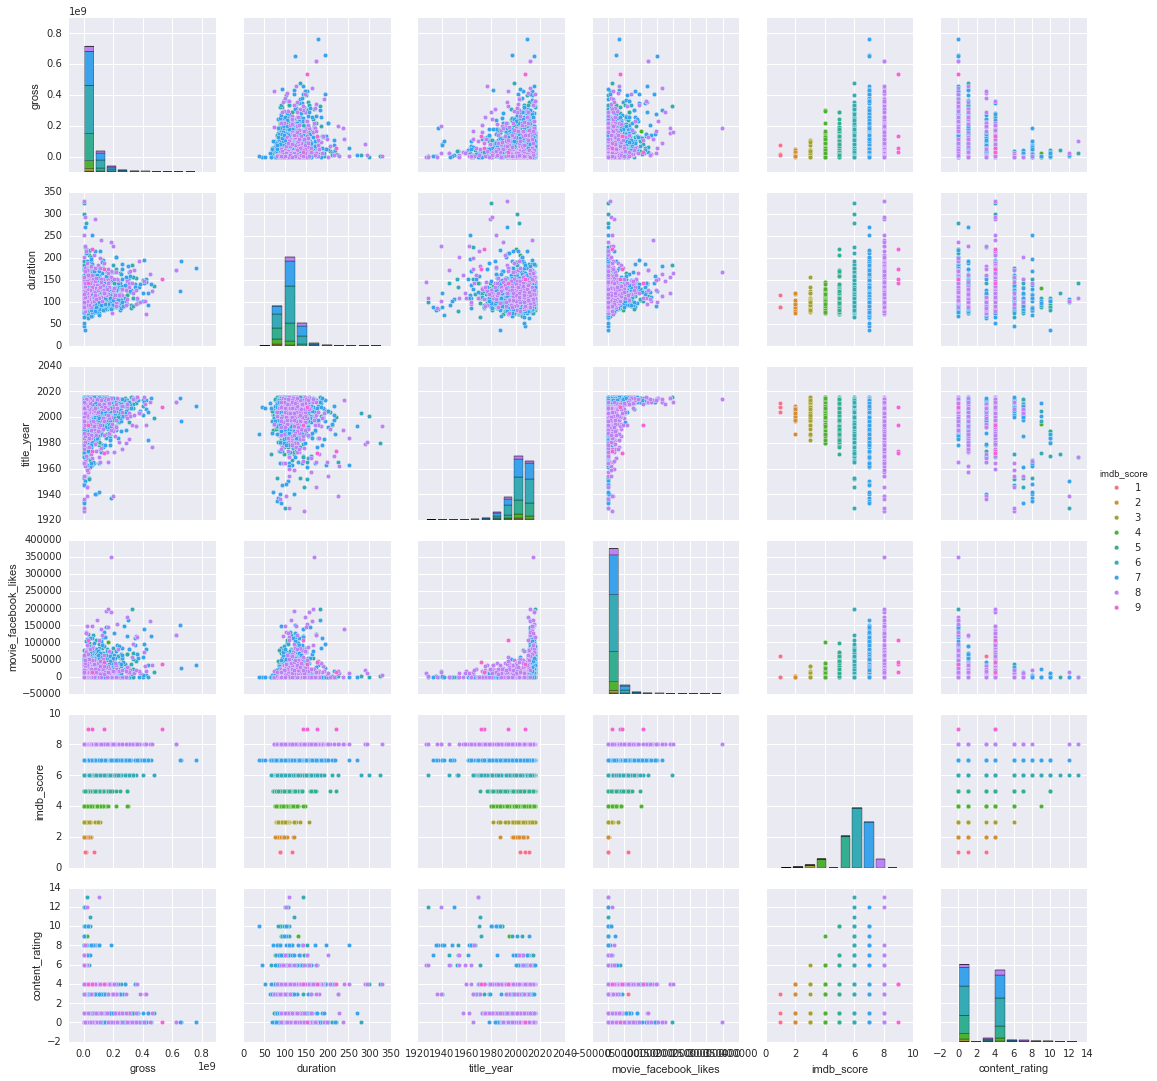

In [38]:
sns.pairplot(num_df, hue='imdb_score')